# Alcohol Consumption Prediction by Students an SVM implementation
#By- Aarush Kumar
#Dated: November 10,2021

In [1]:
from IPython.display import Image
Image(url='https://image.ibb.co/eqPopQ/alc.jpg')

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [3]:
student_mat = pd.read_csv('/home/aarush100616/Downloads/Projects/Student Alcohol Consumption/Data/student-mat.csv')
student_mat

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

In [4]:
display(student_mat[["school","sex","age","Dalc","Walc","health",]].groupby(["age"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="Oranges_r"))

In [5]:
student_mat['label']="1"
student_mat.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 label  
0        3     4     1     1       3        6   5   6   6     1  
1        3     3     1     1       3        4   5   5   6     1  
2        3     2     2     3       3       10   7   8  10     1  
3        2     2     1     1       5        2  15  14  15     1  
4        3     2     1     2       5        4   6  10  10     1  

[5 rows x 34 columns]

In [6]:
student_por = pd.read_csv('/home/aarush100616/Downloads/Projects/Student Alcohol Consumption/Data/student-por.csv')
student_por 

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        4   0  11  11  
1    ...      5        3      3     1     1      3        2   9  11  11  
2    ...      4        3      2     2     3      3        6  12  13  12  
3    ...      3        2      2     1     1      5        0  14  14  14  
4    ...      4        3      2     1     2      5        0  11  13  13  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[649 rows x 33 columns]

In [7]:
display(student_por[["school","sex","age","Dalc","Walc","health",]].groupby(["age"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="Oranges"))

In [8]:
student_por['label']="0"
student_por.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 label  
0        3     4     1     1       3        4   0  11  11     0  
1        3     3     1     1       3        2   9  11  11     0  
2        3     2     2     3       3        6  12  13  12     0  
3        2     2     1     1       5        0  14  14  14     0  
4        3     2     1     2       5        0  11  13  13     0  

[5 rows x 34 columns]

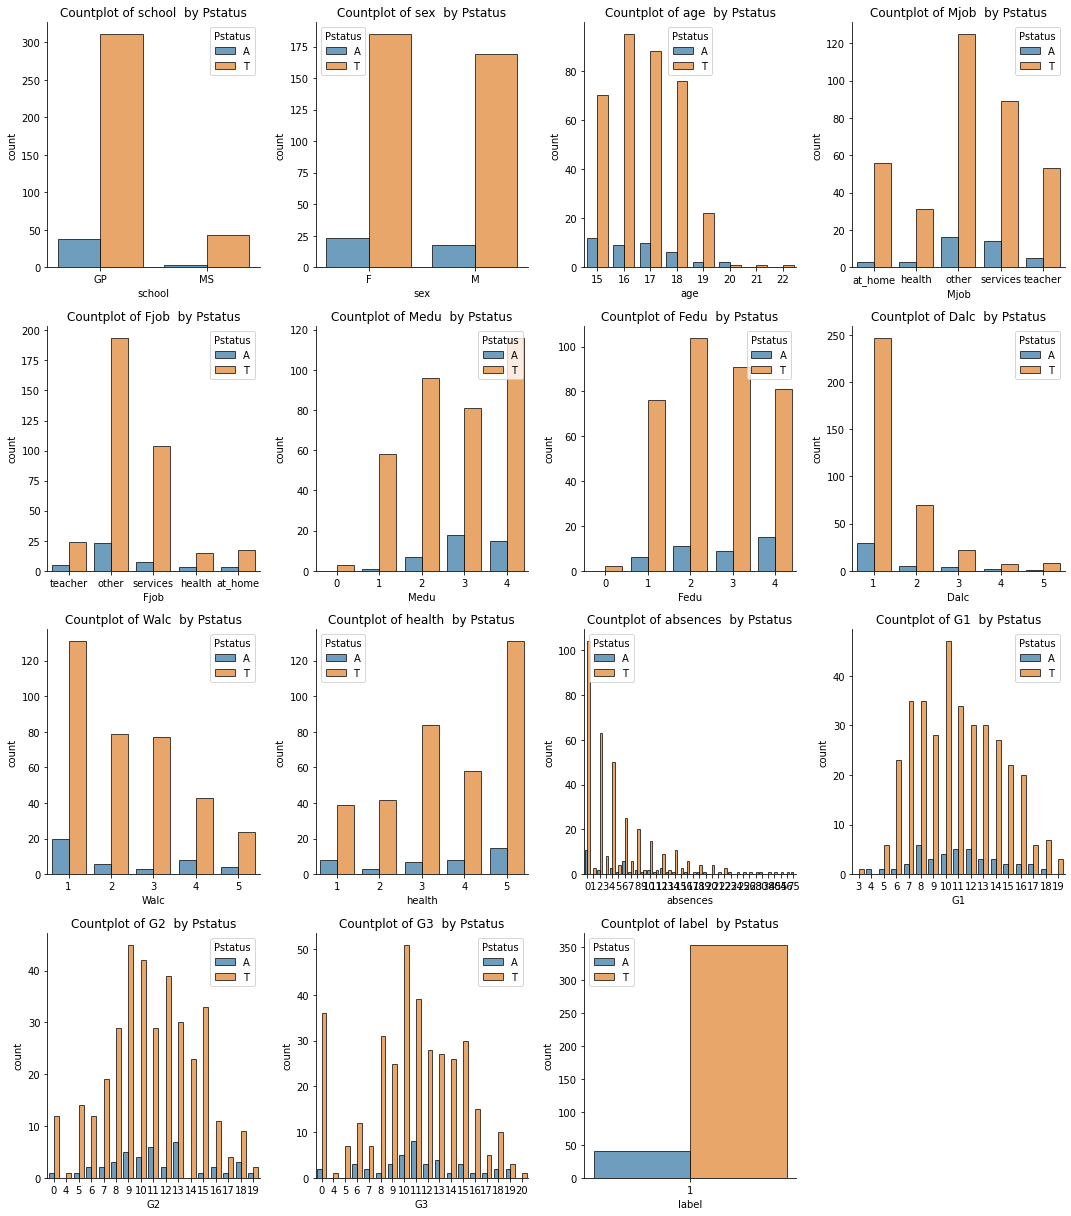

In [9]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[15,17])
fft=['school','sex','age','Mjob','Fjob','Medu','Fedu','Dalc','Walc','health','absences','G1','G2','G3','label']
n=1
for f in fft:
    plt.subplot(4,4,n)
    sns.countplot(x=f, hue='Pstatus', edgecolor="black", alpha=0.7, data=student_mat)
    sns.despine()
    plt.title("Countplot of {}  by Pstatus".format(f))
    n=n+1
plt.tight_layout()
plt.show()

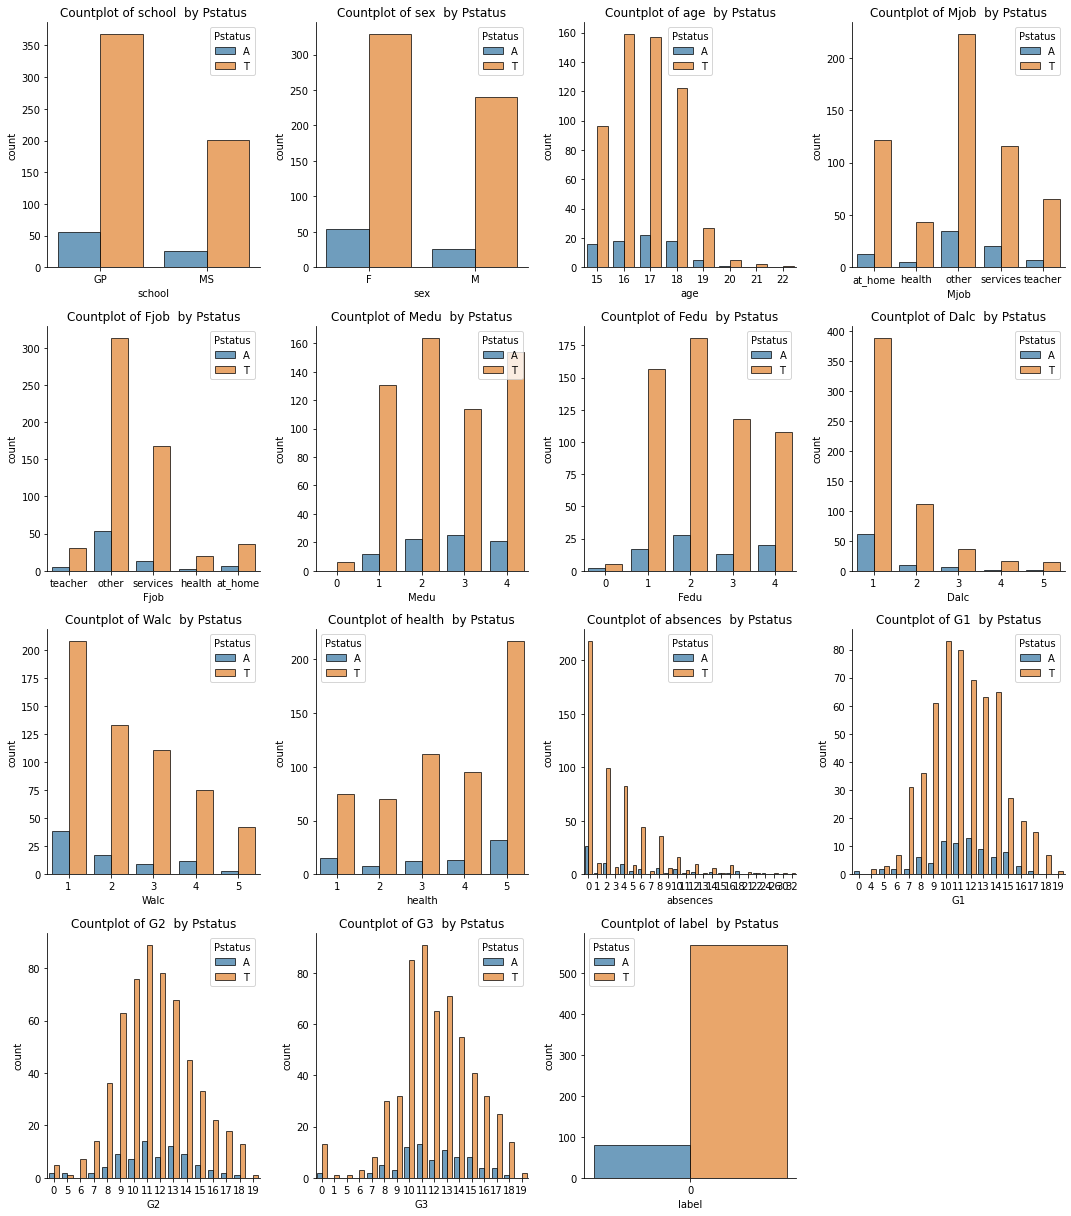

In [10]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[15,17])
fft=['school','sex','age','Mjob','Fjob','Medu','Fedu','Dalc','Walc','health','absences','G1','G2','G3','label']
n=1
for f in fft:
    plt.subplot(4,4,n)
    sns.countplot(x=f, hue='Pstatus', edgecolor="black", alpha=0.7, data=student_por)
    sns.despine()
    plt.title("Countplot of {}  by Pstatus".format(f))
    n=n+1
plt.tight_layout()
plt.show()

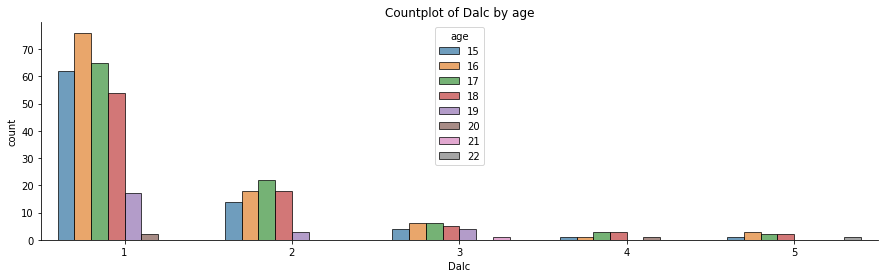

In [11]:
plt.figure(figsize=[15,4])
sns.countplot(x='Dalc', hue='age',edgecolor="black", alpha=0.7, data=student_mat)
sns.despine()
plt.title("Countplot of Dalc by age")
plt.show()

Max: 149 ocurred in [16 17]
Max: 3 ocurred in [21]
Mean: 73.125


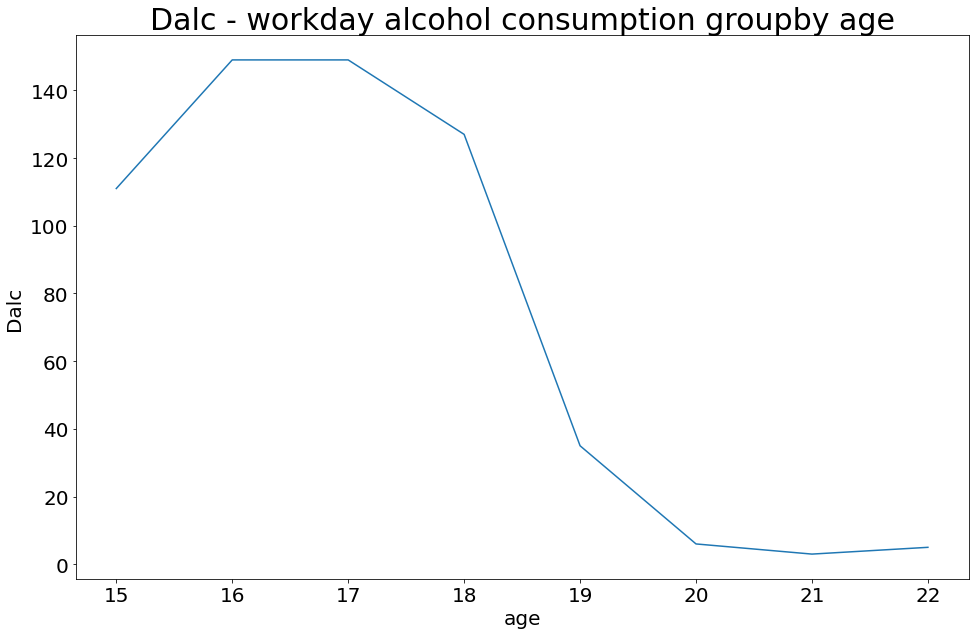

In [12]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = student_mat.groupby('age').sum()['Dalc']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby age', fontsize=20)

plt.ylabel('Dalc ')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

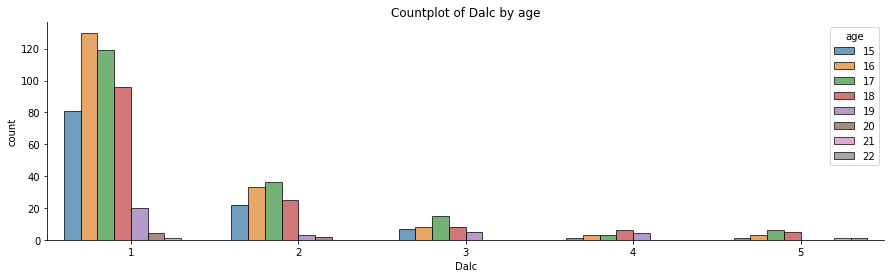

In [13]:
plt.figure(figsize=[15,4])
sns.countplot(x='Dalc', hue='age',edgecolor="black", alpha=0.7, data=student_por)
sns.despine()
plt.title("Countplot of Dalc by age")
plt.show()

Max: 278 ocurred in [17]
Max: 5 ocurred in [22]
Mean: 121.875


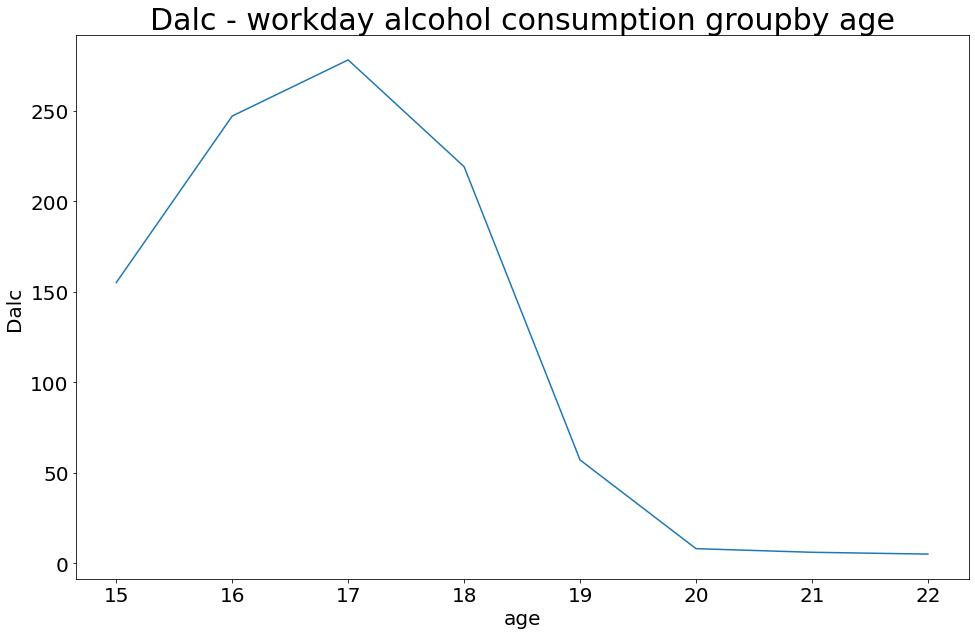

In [14]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = student_por.groupby('age').sum()['Dalc']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby age', fontsize=20)

plt.ylabel('Dalc ')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

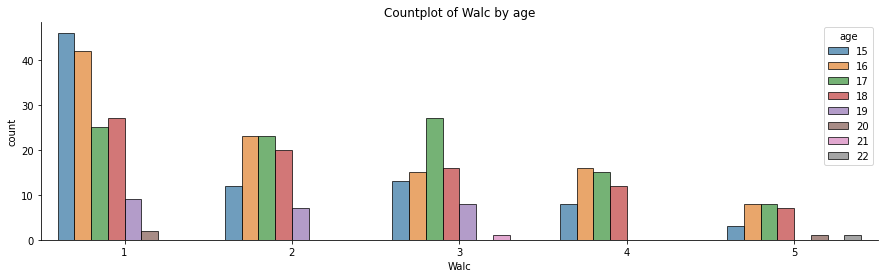

In [15]:
plt.figure(figsize=[15,4])
sns.countplot(x='Walc', hue='age',edgecolor="black", alpha=0.7, data=student_mat)
sns.despine()
plt.title("Countplot of Walc by age")
plt.show()

Max: 252 ocurred in [17]
Max: 3 ocurred in [21]
Mean: 113.125


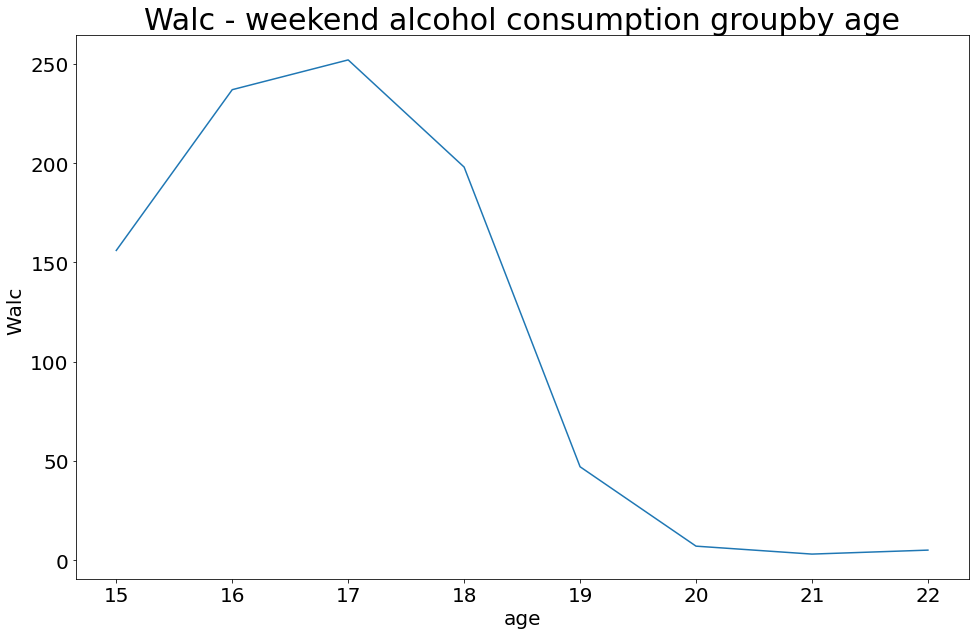

In [16]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = student_mat.groupby('age').sum()['Walc']
dfg.plot(kind='line', title='Walc - weekend alcohol consumption groupby age', fontsize=20)

plt.ylabel('Walc ')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

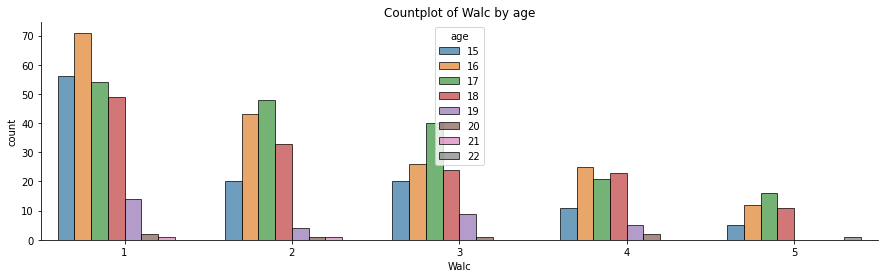

In [17]:
plt.figure(figsize=[15,4])
sns.countplot(x='Walc', hue='age',edgecolor="black", alpha=0.7, data=student_por)
sns.despine()
plt.title("Countplot of Walc by age")
plt.show()

Max: 434 ocurred in [17]
Max: 3 ocurred in [21]
Mean: 185.0


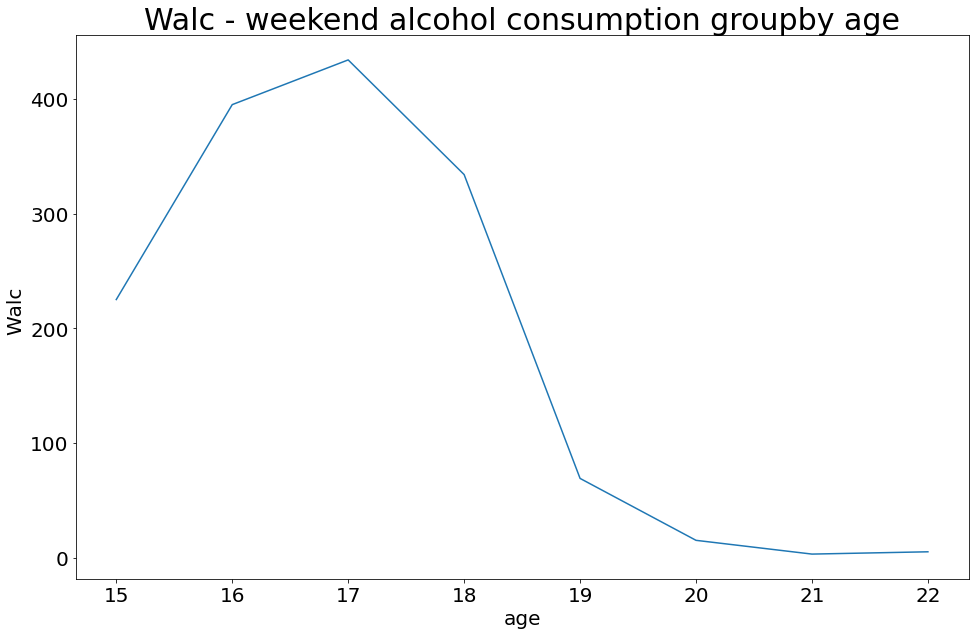

In [18]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = student_por.groupby('age').sum()['Walc']
dfg.plot(kind='line', title='Walc - weekend alcohol consumption groupby age', fontsize=20)

plt.ylabel('Walc ')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

In [19]:
Data= student_mat.append([student_mat,student_por])
x = Data.iloc[:, [3]].values
Data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... freetime goout  Dalc  Walc  health absences  G1  G2  G3 label  
0    ...        3     4     1     1       3        6   5   6   6     1  
1    ...        3     3     1     1       3        4   5   5   6     1  
2    ...        3     2     2     3       3       10   7   8  10     1  
3    ...        2     2     1     1       5        2  15  14  15     1  
4    ...        3     2     1     2       5        4   6  10  10     1  
..   ...      ...   ...   ...   ...     ...      ...  ..  ..  ..   ...  
644  ...        4     2     1     2       5        4  10  11  10     0  
645  ...        3     4     1     1       1        4  15  15  16     0  
646  ...        1     1     1     1       5        6  11  12   9     0  
647  ...        4     5     3     4       2        6  10  10  10     0  
648  ...        4     1     3     4       5        4  10  11  11     0  

[1439 rows x 34 columns]

## Prediction

In [20]:
##Convert string to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [21]:
Data = FunLabelEncoder(Data)
Data.info()
Data.iloc[0:4,:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      1439 non-null   int64
 1   sex         1439 non-null   int64
 2   age         1439 non-null   int64
 3   address     1439 non-null   int64
 4   famsize     1439 non-null   int64
 5   Pstatus     1439 non-null   int64
 6   Medu        1439 non-null   int64
 7   Fedu        1439 non-null   int64
 8   Mjob        1439 non-null   int64
 9   Fjob        1439 non-null   int64
 10  reason      1439 non-null   int64
 11  guardian    1439 non-null   int64
 12  traveltime  1439 non-null   int64
 13  studytime   1439 non-null   int64
 14  failures    1439 non-null   int64
 15  schoolsup   1439 non-null   int64
 16  famsup      1439 non-null   int64
 17  paid        1439 non-null   int64
 18  activities  1439 non-null   int64
 19  nursery     1439 non-null   int64
 20  higher      1439 non-null   int

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   

   freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  label  
0         3      4     1     1       3         6   5   6   6      1  
1         3      3     1     1       3         4   5   5   6      1  
2         3      2     2     3       3        10   7   8  10      1  
3         2      2     1     1       5         2  15  14  15      1  

[4 rows x 34 columns]

In [22]:
from sklearn.model_selection import train_test_split
Y = Data['label']
X = Data.drop(columns=['label'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=9)

In [23]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (1223, 33)
Y train shape:  (1223,)
X test shape:  (216, 33)
Y test shape:  (216,)


In [24]:
X_train

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
403       0    0   17        1        0        1     2     1     3     2  ...   
445       1    1   15        0        0        1     1     1     2     2  ...   
290       0    0   19        1        0        1     2     2     3     3  ...   
244       0    0   18        1        0        1     2     1     2     2  ...   
313       0    0   19        1        1        1     3     2     3     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
56        0    0   15        1        0        0     4     3     3     3  ...   
106       0    0   15        1        0        1     2     2     2     2  ...   
243       0    1   16        1        0        1     4     4     3     3  ...   
348       0    0   17        1        0        1     4     3     1     2  ...   
382       1    1   17        1        0        1     2     3     2     3  ...   

     famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
403       4         3      4     2     2       1        10  12  15  15  
445       5         4      5     2     4       4         8   7   9   9  
290       4         3      3     1     1       5         0  10  10  11  
244       4         4      4     1     1       3         0   7   0   0  
313       4         2      2     1     2       1        22  13  10  11  
..      ...       ...    ...   ...   ...     ...       ...  ..  ..  ..  
56        4         3      2     1     1       1         0  14  15  15  
106       5         1      2     1     1       3         8   7   8   8  
243       5         3      2     1     2       5         0  13  12  12  
348       4         4      3     1     3       4         0  13  15  15  
382       4         4      3     1     1       3         2  11  11  10  

[1223 rows x 33 columns]

In [25]:
Y_train

403    0
445    0
290    0
244    1
313    1
      ..
56     1
106    1
243    1
348    1
382    1
Name: label, Length: 1223, dtype: int64

In [26]:
X_test

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
446       1    1   15        1        1        1     3     3     0     0  ...   
324       0    0   17        1        1        1     0     2     0     0  ...   
124       0    0   16        1        0        1     2     2     2     2  ...   
591       1    0   18        1        0        1     2     2     3     0  ...   
38        0    0   15        0        0        1     3     4     3     1  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
415       0    0   19        1        0        1     4     4     4     2  ...   
510       1    0   17        0        0        1     2     2     2     2  ...   
307       0    1   19        1        0        1     4     4     4     3  ...   
181       0    0   16        1        0        1     4     2     1     3  ...   
323       0    0   17        1        0        1     3     1     3     3  ...   

     famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
446       5         3      3     1     1       5         0  11  11  11  
324       3         3      3     2     3       2         0  16  15  15  
124       5         4      4     1     1       5         0  12  11  11  
591       4         3      5     1     1       1         2  12  13  14  
38        4         3      2     1     1       5         2  12  12  11  
..      ...       ...    ...   ...   ...     ...       ...  ..  ..  ..  
415       3         2      5     4     4       5         5   9  10  11  
510       5         3      2     1     1       1         0  15  17  17  
307       4         3      4     1     1       4        38   8   9   8  
181       4         2      3     1     1       3         0  17  17  18  
323       3         4      3     2     3       5         1  12  14  15  

[216 rows x 33 columns]

In [28]:
Y_test

446    0
324    1
124    0
591    0
38     1
      ..
415    0
510    0
307    1
181    0
323    1
Name: label, Length: 216, dtype: int64

## SVM (Support Vector Machine) classification

SVMs (Support Vector Machine) have shown a rapid proliferation during the last years. The learning problem setting for SVMs corresponds to a some unknown and nonlinear dependency (mapping, function) y=f(x)
between some high-dimensional input vector x and scalar output y. It is noteworthy that there is no information on the joint probability functions, therefore, a free distribution learning must be carried out. The only information available is a training data set D=(xi,yi)∈X×Y,i=1, l, where l stands for the number of the training data pairs and is therefore equal to the size of the training data set D, additionally, yi is denoted as di, where d

stands for a desired (target) value. Hence, SVMs belong to the supervised learning techniques.

From the classification approach, the goal of SVM is to find a hyperplane in an N-dimensional space that clearly classifies the data points. Thus hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes.

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# We define the SVM model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), 
                                               n_jobs=-1))

# We train model
svmcla.fit(X_train, Y_train)

# We predict target values
Y_predict2 = svmcla.predict(X_test)

In [30]:
test_acc_svmcla = round(svmcla.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_svmcla = round(svmcla.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

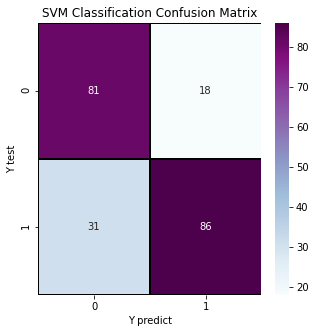

In [31]:
# The confusion matrix
svmcla = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [32]:
model = pd.DataFrame({
    'Model': ['SVM'],
    'Train Score': [train_acc_svmcla],
    'Test Score': [test_acc_svmcla]
})
model.sort_values(by='Test Score', ascending=False)

Model  Train Score  Test Score
0   SVM        80.05       78.24

In [33]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict2)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.75
